# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from ddpg_agent import Agent
import time
from collections import deque
import torch
import matplotlib.pyplot as plt
import pandas as pd

%load_ext autoreload
%autoreload 2

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='./Reacher_Windows_x86_64/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#while True:
for x in range(100):
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.0


When finished, you can close the environment.

In [6]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

#### Approach

* Overall we use a [DDPG](https://arxiv.org/abs/1509.02971) network to solve the problem, which is good for solving for problems with continuous action space. 

* DDPG consists of two networks. The actor network takes in the state, and output the action (from continuous space). And the critic network takes in the state and the action to estimate the state-action value function. Note that this is different from the DQN network where the input is the state and output is the Q values of all the actions. The critic network here takes in the action as well and output only one single Q value for the state-action pair.

* For the critic network, we have introduced a batch norm layer for the state input before concatenating the state with the action. This serves as a sort of embedding and lets the network to learn how best to combine the state input and the action input.

* For the actor network, we used a tanh activation function at the final layer as the output action space are all between 1 and -1

* Gaussian noise is added to the output action to encourage exploration. The noise level amortizies down to 1% as we train. 

* Replay buffer is used to randomly sample the experience and this helps breaking the correlation between consecutive samples. This also make the train more data efficient as we don't throw away the data immediately.

* To further stablizes the training, we have also introduced target actor and critic networks, which are moving slower than the corresponding local networks. The local networks are responsible for making the actual action recommendations, but the target networks are used for backpop-ing the network. This bifurcation stablizes the training process as we won't be chasing a fast moving target. The target network is soft updated by a moving avg of the local parameters. This is basically the same idea as the [Double DQN](https://arxiv.org/abs/1509.06461) network.

#### Potential Enhancements to the Approach
* We can potentially try out different noise terms to see what works the best. Eg, I have seen examples of using an OU process as the noise term for problems with continuous action space.

* We can also try [Prioried Experience Replay](https://arxiv.org/abs/1511.05952) where we prioritize the experience of higher TD difference. This is supposed to speed up training even further by showing the model experiences that leads to more learning.
  

In [7]:
def ddpg(agent, n_episodes=1000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, filename=""):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
        filename (string): filename to save the model parameters
    """
    high_score = 0
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=30)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    times = deque(maxlen=30)
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        time1 = time.time()
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action[0])[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        time2 = time.time()
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        times.append(time2-time1)
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tRolling Score: {:.2f}\tAverage Time: {:.2f}\tBest Score Saved: {:.2f}'.format(i_episode, np.mean(scores_window), np.mean(times),high_score), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tRolling Score: {:.2f}\tAverage Time: {:.2f}\tBest Score Saved: {:.2f}'.format(i_episode, np.mean(scores_window), np.mean(times),high_score))
        mean_score = np.mean(scores_window)
        if mean_score>=high_score:
            torch.save(agent.actor_local.state_dict(), "actor_local")
            torch.save(agent.actor_target.state_dict(), "actor_target")
            torch.save(agent.critic_local.state_dict(), "critic_local")
            torch.save(agent.critic_target.state_dict(), "critic_target")
            high_score = mean_score
            
    return scores

In [8]:
agent = Agent(state_size, action_size, seed=1)

In [9]:
scores=ddpg(agent, n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, filename="ddpg")

Episode 100	Rolling Score: 2.30	Average Time: 4.39	Best Score Saved: 2.31
Episode 200	Rolling Score: 7.78	Average Time: 4.39	Best Score Saved: 7.77
Episode 300	Rolling Score: 18.27	Average Time: 4.43	Best Score Saved: 19.56
Episode 400	Rolling Score: 23.45	Average Time: 4.37	Best Score Saved: 25.36
Episode 500	Rolling Score: 26.04	Average Time: 4.37	Best Score Saved: 29.69
Episode 600	Rolling Score: 26.14	Average Time: 4.37	Best Score Saved: 29.69
Episode 700	Rolling Score: 29.17	Average Time: 4.37	Best Score Saved: 31.85
Episode 800	Rolling Score: 28.81	Average Time: 4.37	Best Score Saved: 33.31
Episode 900	Rolling Score: 22.70	Average Time: 4.38	Best Score Saved: 35.40
Episode 1000	Rolling Score: 25.44	Average Time: 4.37	Best Score Saved: 35.40
Episode 1100	Rolling Score: 31.18	Average Time: 4.38	Best Score Saved: 35.40
Episode 1200	Rolling Score: 30.82	Average Time: 4.38	Best Score Saved: 35.40
Episode 1300	Rolling Score: 29.39	Average Time: 4.48	Best Score Saved: 35.40
Episode 1400

#### Results

Below graph shows that the model has successfully met the benchmark of having 30 points or higher for 30 consecutive episodes at around 600 episodes. Further training does not really improve the results significantly and from the graph below we can see the the training itself is a little bit unstable.

Text(0.5, 0, '#episodes')

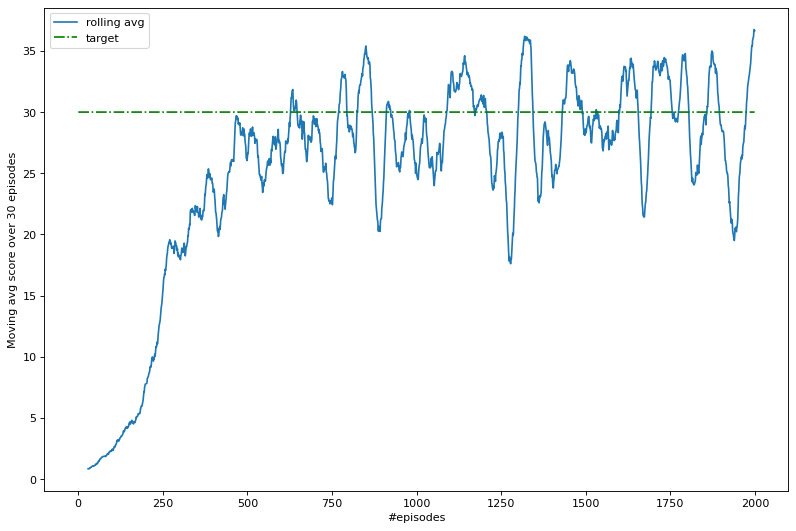

In [51]:
from matplotlib.pyplot import figure
figure(figsize=(12, 8), dpi=80)
rolling=pd.Series(scores).rolling(30).mean()
ys = 0.*np.array(scores) + 30
plt.plot(rolling, label='rolling avg')
plt.plot(ys, 'g-.', label='target')
plt.legend()
plt.ylabel('Moving avg score over 30 episodes')
plt.xlabel('#episodes')